# Homework: Phrasal Chunking

# Introduction:

    The development includes two stages:
    
    The first stage is the implement of the baseline algorithm. The challenge is understanding of vectors' dimensions in the algorithm. 
    
    The second stage is improvement. Reading the two papers about the average perceptron and improving with the pseudocode. Evaluating our improved algorithm with different numepoches. 
    

# Baseline: 

For each sentence, using viterbi algorithm from perc.py to find the most likely chunk tag sequence (with a continuously updating feature vector).

Compare all features of each word from the output from viterbi with the sentence from the reference. If there is missing feature, add 1 to its weight; if there is wrong feature, subtract it's weight by 1.

Noted that this apply to both unigram and bigram features.

The idea of the baseline is not complicated. However, it is difficult to figure out how to implement it with mere the description on the hw3 web page. After reading the correspoding paper, the meaing of the varibles (such as global feature, local feature, dimention, etc ) is much more clear. 


# Improvement from average learning algorithm: 

    We then improved the baseline algorithm based on the algorithm from Prof's paper in page 38.
    
    We basically add two more vector, namely, sigma_vector and tau, corresponding to the two additional vectors used in the paper, which is the average vector and location vector records the location.
    
    We have to deal with two cases,  one is unigram and the other is bigram. And as stated in the average algorithm, we make a special case in which current sentence is the last sentence in training data. In unigram, we rewards the case if the output tag is same as the true tag, and penalize if it is not. We make comparison based on the pair of current tag and previous tag in bigram. With this average algorthim, we improved accuracy and efficiency.
    
    

# Different experiments:

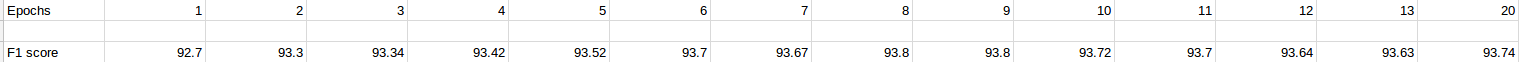

In [1]:
from IPython.display import Image
Image(filename = "F1_score_epochs.png")


# Current best result:

Note:

    We modified the orignal perc.py a bit and rename as perc_xza as follow, in order to make it runnable on jupyter notebook.(Instead of print the output, we write the output to the "data/output")
    
    If you want to run it in the terminal, please run the original file perc.py as follow:
        python3 chunk.py (with same command line)
        python3 perc.py | python3 score_chunks.py (with same )

In [3]:
import chunk
import perc_xza as perc
import score_chunks
import gzip # use compressed data files
import copy, operator, optparse, sys, os


feat_vec = {}
tagset = []
train_data = []

tagset = perc.read_tagset("data/tagset.txt")
train_data = perc.read_labeled_data("data/train.txt.gz", "data/train.feats.gz")
feat_vec = chunk.perc_train(train_data, tagset, int(9))

print("reading data ...", file=sys.stderr)
test_data = perc.read_labeled_data("data/input.txt.gz", "data/input.feats.gz", verbose=False)
print("done.", file=sys.stderr)
perc.perc_testall(feat_vec, test_data, tagset)


with open('data/output') as f:
	(test, reference) = score_chunks.readTestFile(f.read(), "-X-",'O', False, 2)

with open('data/reference500.txt') as f:
	(reference, _) = score_chunks.readTestFile(f.read(), "-X-",'O', False, 2)

print("Score: %.2f" % score_chunks.corpus_fmeasure(reference, test, False))

reading data ...
done.


processed 500 sentences with 10375 tokens and 5783 phrases; found phrases: 5782; correct phrases: 5424
             ADJP: precision:  73.47%; recall:  72.73%; F1:  73.10; found:     98; correct:     99
             ADVP: precision:  80.00%; recall:  79.21%; F1:  79.60; found:    200; correct:    202
            CONJP: precision: 100.00%; recall:  60.00%; F1:  75.00; found:      3; correct:      5
             INTJ: precision:   0.00%; recall:   0.00%; F1:   0.00; found:      0; correct:      1
               NP: precision:  94.76%; recall:  94.48%; F1:  94.62; found:   3017; correct:   3026
               PP: precision:  97.16%; recall:  97.95%; F1:  97.55; found:   1231; correct:   1221
              PRT: precision:  77.27%; recall:  77.27%; F1:  77.27; found:     22; correct:     22
             SBAR: precision:  86.27%; recall:  82.24%; F1:  84.21; found:    102; correct:    107
               VP: precision:  92.79%; recall:  93.55%; F1:  93.16; found:   1109; correct:   1100
accura